# BT4222 Project
Chantelle Shum Wan Qing<br>
Kim Sangwoo<br>
Megumi Low Jie Hui<br>
Tan Pei Sze<br>
Joel Tan Jun Hao



In [5]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import GridSearchCV

import keras
import tensorflow as tf

random.seed(1234)
np.random.seed(1234)
#note: it appears that despite setting the seed, whenever colab's runtime changes, it produces different results

In [ ]:
application_data = pd.read_csv("./application_record.csv", encoding = 'utf-8') 
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_data = pd.read_csv("./credit_record.csv", encoding = 'utf-8') 
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## **Exploratory Data Analysis**

In [ ]:
application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,1.609160e+05,160916.000000,1.609160e+05,160916.000000,160916.000000,160916.0,160916.000000,160916.000000,160916.000000,160915.000000
mean,5.489398e+06,0.433972,1.857864e+05,-16034.788685,62571.871865,1.0,0.215672,0.299442,0.087996,2.205823
std,3.991078e+05,0.735165,1.055267e+05,4207.164966,140464.999264,0.0,0.411289,0.458015,0.283290,0.906361
min,5.008804e+06,0.000000,2.700000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.169134e+06,0.000000,1.170000e+05,-19548.000000,-3054.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.416876e+06,0.000000,1.575000e+05,-15612.000000,-1462.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.680285e+06,1.000000,2.250000e+05,-12544.000000,-354.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.840318e+06,19.000000,3.950060e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
credit_data.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


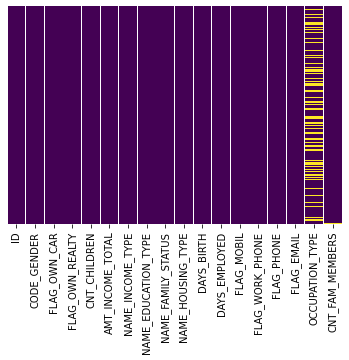

In [ ]:
# to check missing values
sns.heatmap(application_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.show()

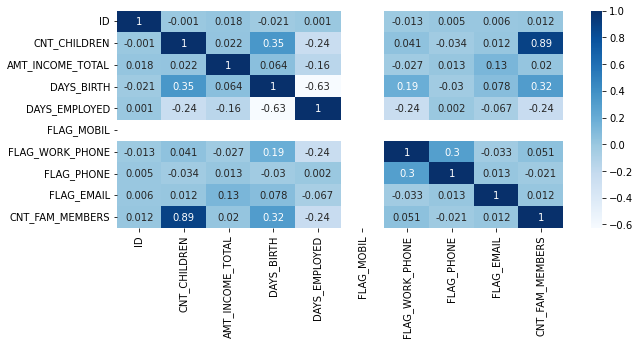

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(application_data.corr().round(3),cmap='Blues',annot=True) 
plt.show()

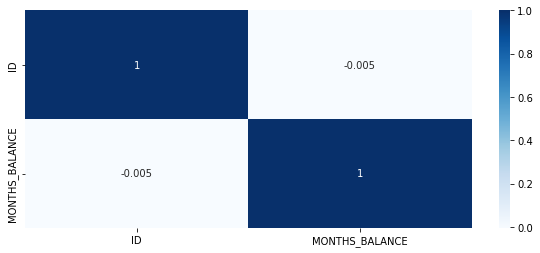

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(credit_data.corr().round(3),cmap='Blues',annot=True) 
plt.show()

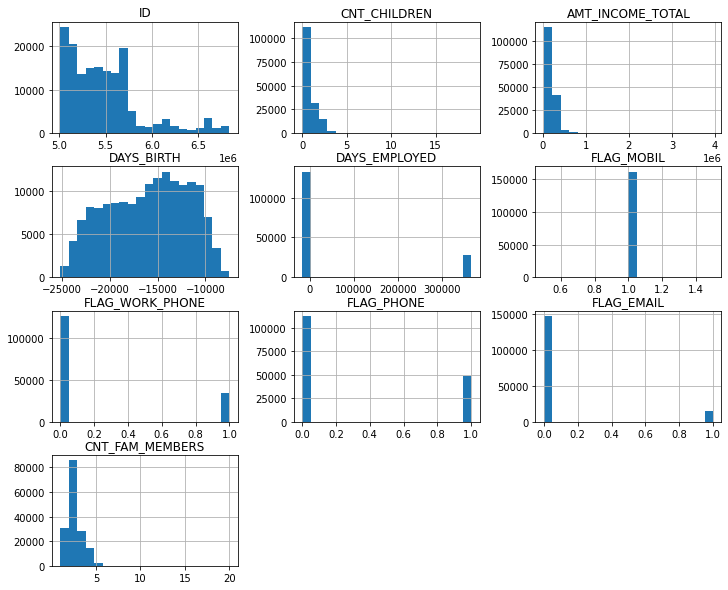

In [ ]:
# distribution
application_data.hist(figsize=(12,10),bins=20)
plt.show()

c:\Users\Joel Tan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Total Income'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

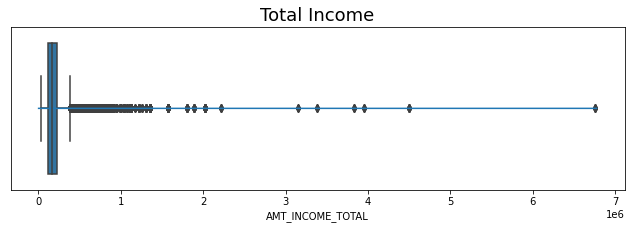

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(11,3))
ax.set_title("Total Income",fontsize=18)
sns.boxplot(x="AMT_INCOME_TOTAL", data=application_data, ax=ax)
ax.set(yticks=[])
sns.distplot(application_data["AMT_INCOME_TOTAL"],kde=True)

## **Feature Engineering**

In [ ]:
# fill in missing values for occupation type
application_data['OCCUPATION_TYPE'].fillna(value='Others', inplace=True)

In [ ]:
# features under application record (convert to positive value)

# 1. Birthday to Age
application_data["DAYS_BIRTH"] = -(application_data["DAYS_BIRTH"])
application_data["AGE"] = (application_data["DAYS_BIRTH"]) // 365

# 2. Days since employment
application_data["DAYS_EMPLOYED"] = -(application_data["DAYS_EMPLOYED"]) 

In [ ]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
# convert months_balance in credit_data to positive value
credit_data["MONTHS_BALANCE"] = credit_data["MONTHS_BALANCE"] *-1
start_month = credit_data.groupby(['ID'])['MONTHS_BALANCE'].min()
start_month.head()

ID
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
Name: MONTHS_BALANCE, dtype: int64

In [ ]:
application_data = application_data.merge(start_month, on='ID')
application_data.rename(columns={'MONTHS_BALANCE':'START_MONTH'}, inplace=True)
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,58,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52,22


In [ ]:
#risk users with > 60 days overdue or unemployed (income under 25th percentile)
overdue = ['2','3','4','5']

credit_data['RISK'] = 0
for i in overdue:
    credit_data['RISK'][credit_data['STATUS'] == i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
risk_list = credit_data.groupby(['ID'])['RISK'].max()
risk_list.head()

ID
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
Name: RISK, dtype: int64

In [ ]:
#> 60 days overdue
data = application_data.merge(risk_list, on='ID')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1134,1,0,0,0,Security staff,2.0,58,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,22,0


In [ ]:
#unemployed (income under $100,000)
threshold = 100000
data.loc[(data['DAYS_EMPLOYED'] < 0) & (data['AMT_INCOME_TOTAL'] < threshold), 'RISK'] = 1
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1134,1,0,0,0,Security staff,2.0,58,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,22,0


In [ ]:
data['TARGET'] = 0
data['TARGET'][data['RISK'] == 0] = 1
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Others,2.0,32,0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Others,2.0,32,0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58,0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,22,0,1


In [ ]:
data['TARGET'].value_counts()

1    34174
0     2283
Name: TARGET, dtype: int64

In [ ]:
data['TARGET'].value_counts(normalize = True)

1    0.937378
0    0.062622
Name: TARGET, dtype: float64

In [ ]:
#extract risk and target list
risk_list = data['RISK']
target = data['TARGET']
data = data.drop(['RISK', 'TARGET'], axis = 1)

In [ ]:
#convert to binary
data['CODE_GENDER'] = data['CODE_GENDER'].replace(['F','M'],[0,1])
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

In [ ]:
#one hot encoding
process = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for i in process:
    one_hot = pd.get_dummies(data[i])
    data = data.drop(i, axis = 1)
    data = data.join(one_hot)

In [ ]:
#remove irrelevant columns
data = data.drop(columns=['ID', 'DAYS_BIRTH'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CODE_GENDER                    36457 non-null  int64  
 1   FLAG_OWN_CAR                   36457 non-null  int64  
 2   FLAG_OWN_REALTY                36457 non-null  int64  
 3   CNT_CHILDREN                   36457 non-null  int64  
 4   AMT_INCOME_TOTAL               36457 non-null  float64
 5   DAYS_EMPLOYED                  36457 non-null  int64  
 6   FLAG_MOBIL                     36457 non-null  int64  
 7   FLAG_WORK_PHONE                36457 non-null  int64  
 8   FLAG_PHONE                     36457 non-null  int64  
 9   FLAG_EMAIL                     36457 non-null  int64  
 10  CNT_FAM_MEMBERS                36457 non-null  float64
 11  AGE                            36457 non-null  int64  
 12  START_MONTH                    36457 non-null 

In [ ]:
X_data = data
Y_data = target #0 = reject, 1 = approve

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 1234)

In [ ]:
#standard scaling
scale_list = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'START_MONTH', 'CNT_FAM_MEMBERS']

std_scaler = StandardScaler()
X_train[scale_list] = std_scaler.fit_transform(X_train[scale_list])

std_scaler = StandardScaler()
X_test[scale_list] = std_scaler.fit_transform(X_test[scale_list])

In [ ]:
#feature engineering complete
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,Low-skill Laborers,Managers,Medicine staff,Others,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
20784,0,1,0,0,-0.507387,0.478846,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
18675,0,1,1,0,-0.197821,0.452385,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24633,1,0,0,1,0.155969,0.438565,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29328,0,0,1,0,-0.507387,-2.226958,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21683,1,1,1,0,2.146036,0.448741,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


## **Models**

### **Decision Tree**

In [ ]:
%%time
#decision tree (Chantelle)
model_tree = DecisionTreeClassifier(max_depth=5,
                               min_samples_split=5,
                               random_state=1234)
model_tree.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_tree)))
print('Precision Score:', (precision_score(y_train, y_predict_tree)))
print('Recall Score:', (recall_score(y_train, y_predict_tree)))
print('F1 Score:', (f1_score(y_train, y_predict_tree)))

y_score_tree = model_tree.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_tree[:,1])))

Accuracy Score: 0.9848448482770444
Precision Score: 0.9842292874374392
Recall Score: 0.9998536888693808
F1 Score: 0.9919799680650312
ROC Score: 0.9215959235122908
CPU times: user 163 ms, sys: 2.01 ms, total: 165 ms
Wall time: 162 ms


[[ 1388   438]
 [    4 27335]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


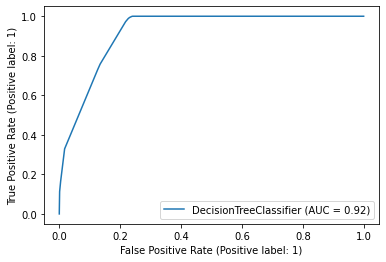

In [ ]:
print(confusion_matrix(y_train, y_predict_tree))
print(plot_roc_curve(model_tree, X_train, y_train))

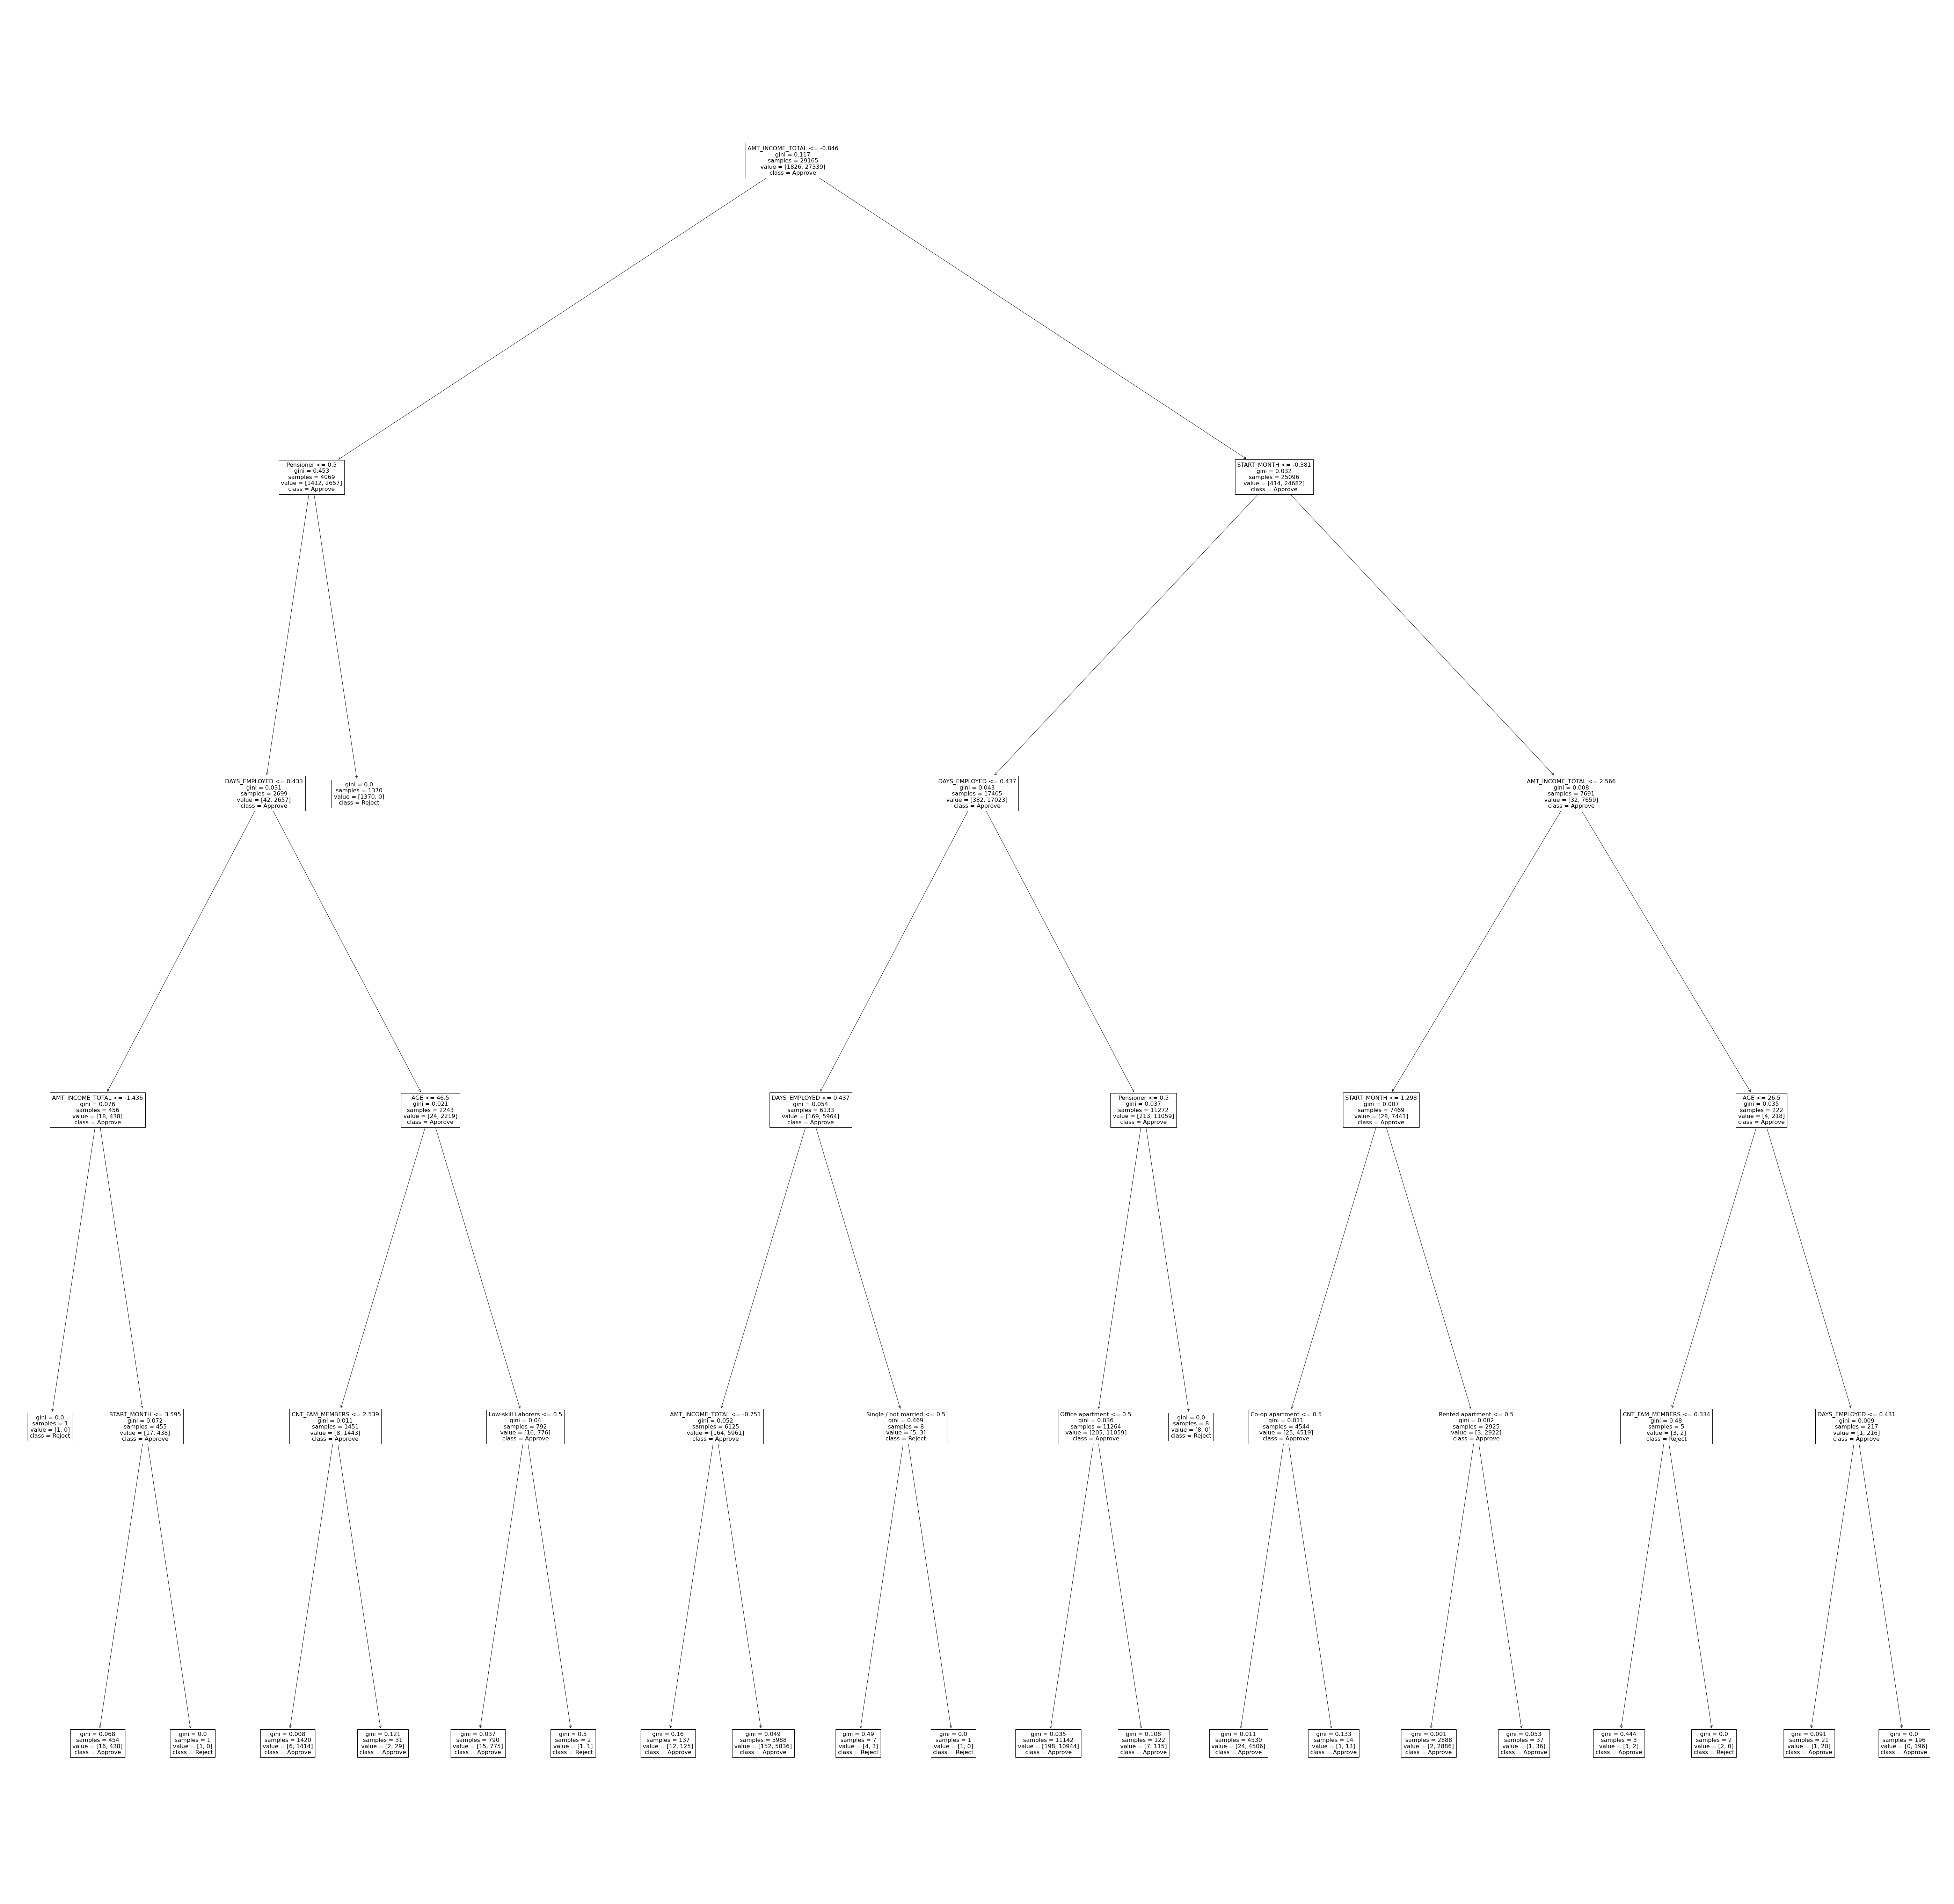

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(model_tree, feature_names = data.columns, class_names = ['Reject', 'Approve'])

In [ ]:
#decision tree - tuning parameters (Chantelle)
parameters = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [3, 4, 5, 6, 7],
              'random_state': [1234]}

In [ ]:
%%time
model_tune = DecisionTreeClassifier()
tree_tune = GridSearchCV(model_tune,
                        parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_tree = tree_tune.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=6, random_sta

In [ ]:
print(model_tree.best_params_)

y_predict_tree = model_tree.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_tree)))
print('Precision Score:', (precision_score(y_train, y_predict_tree)))
print('Recall Score:', (recall_score(y_train, y_predict_tree)))
print('F1 Score:', (f1_score(y_train, y_predict_tree)))

y_score_tree = model_tree.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_tree[:,1])))

{'max_depth': 7, 'min_samples_split': 3, 'random_state': 1234}
Accuracy Score: 0.9852905880336019
Precision Score: 0.9847600518806745
Recall Score: 0.9997805333040711
F1 Score: 0.9922134494963246
ROC Score: 0.9316676640422409


[[ 1403   423]
 [    6 27333]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


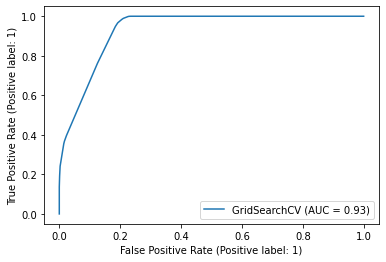

In [ ]:
print(confusion_matrix(y_train, y_predict_tree))
print(plot_roc_curve(model_tree, X_train, y_train))

### **Random Forest**

In [ ]:
%%time
#random forest (Chantelle)
model_rf = RandomForestClassifier(n_estimators=250,
                              max_depth=5,
                              min_samples_leaf=5,
                              random_state = 1234)
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_rf)))
print('Precision Score:', (precision_score(y_train, y_predict_rf)))
print('Recall Score:', (recall_score(y_train, y_predict_rf)))
print('F1 Score:', (f1_score(y_train, y_predict_rf)))

y_score_rf = model_rf.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))

Accuracy Score: 0.9941473133677853
Precision Score: 0.9938618257803318
Recall Score: 1.0
F1 Score: 0.9969214645968429
ROC Score: 0.9761067951456325
CPU times: user 2.68 s, sys: 21.1 ms, total: 2.7 s
Wall time: 2.73 s


[[  747    94]
 [    0 15220]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


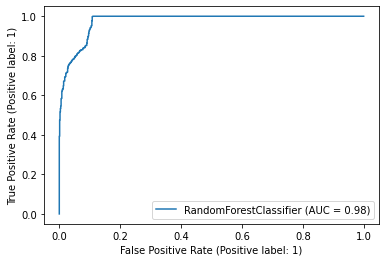

In [ ]:
print(confusion_matrix(y_train,y_predict_rf))
print(plot_roc_curve(model_rf, X_train, y_train))

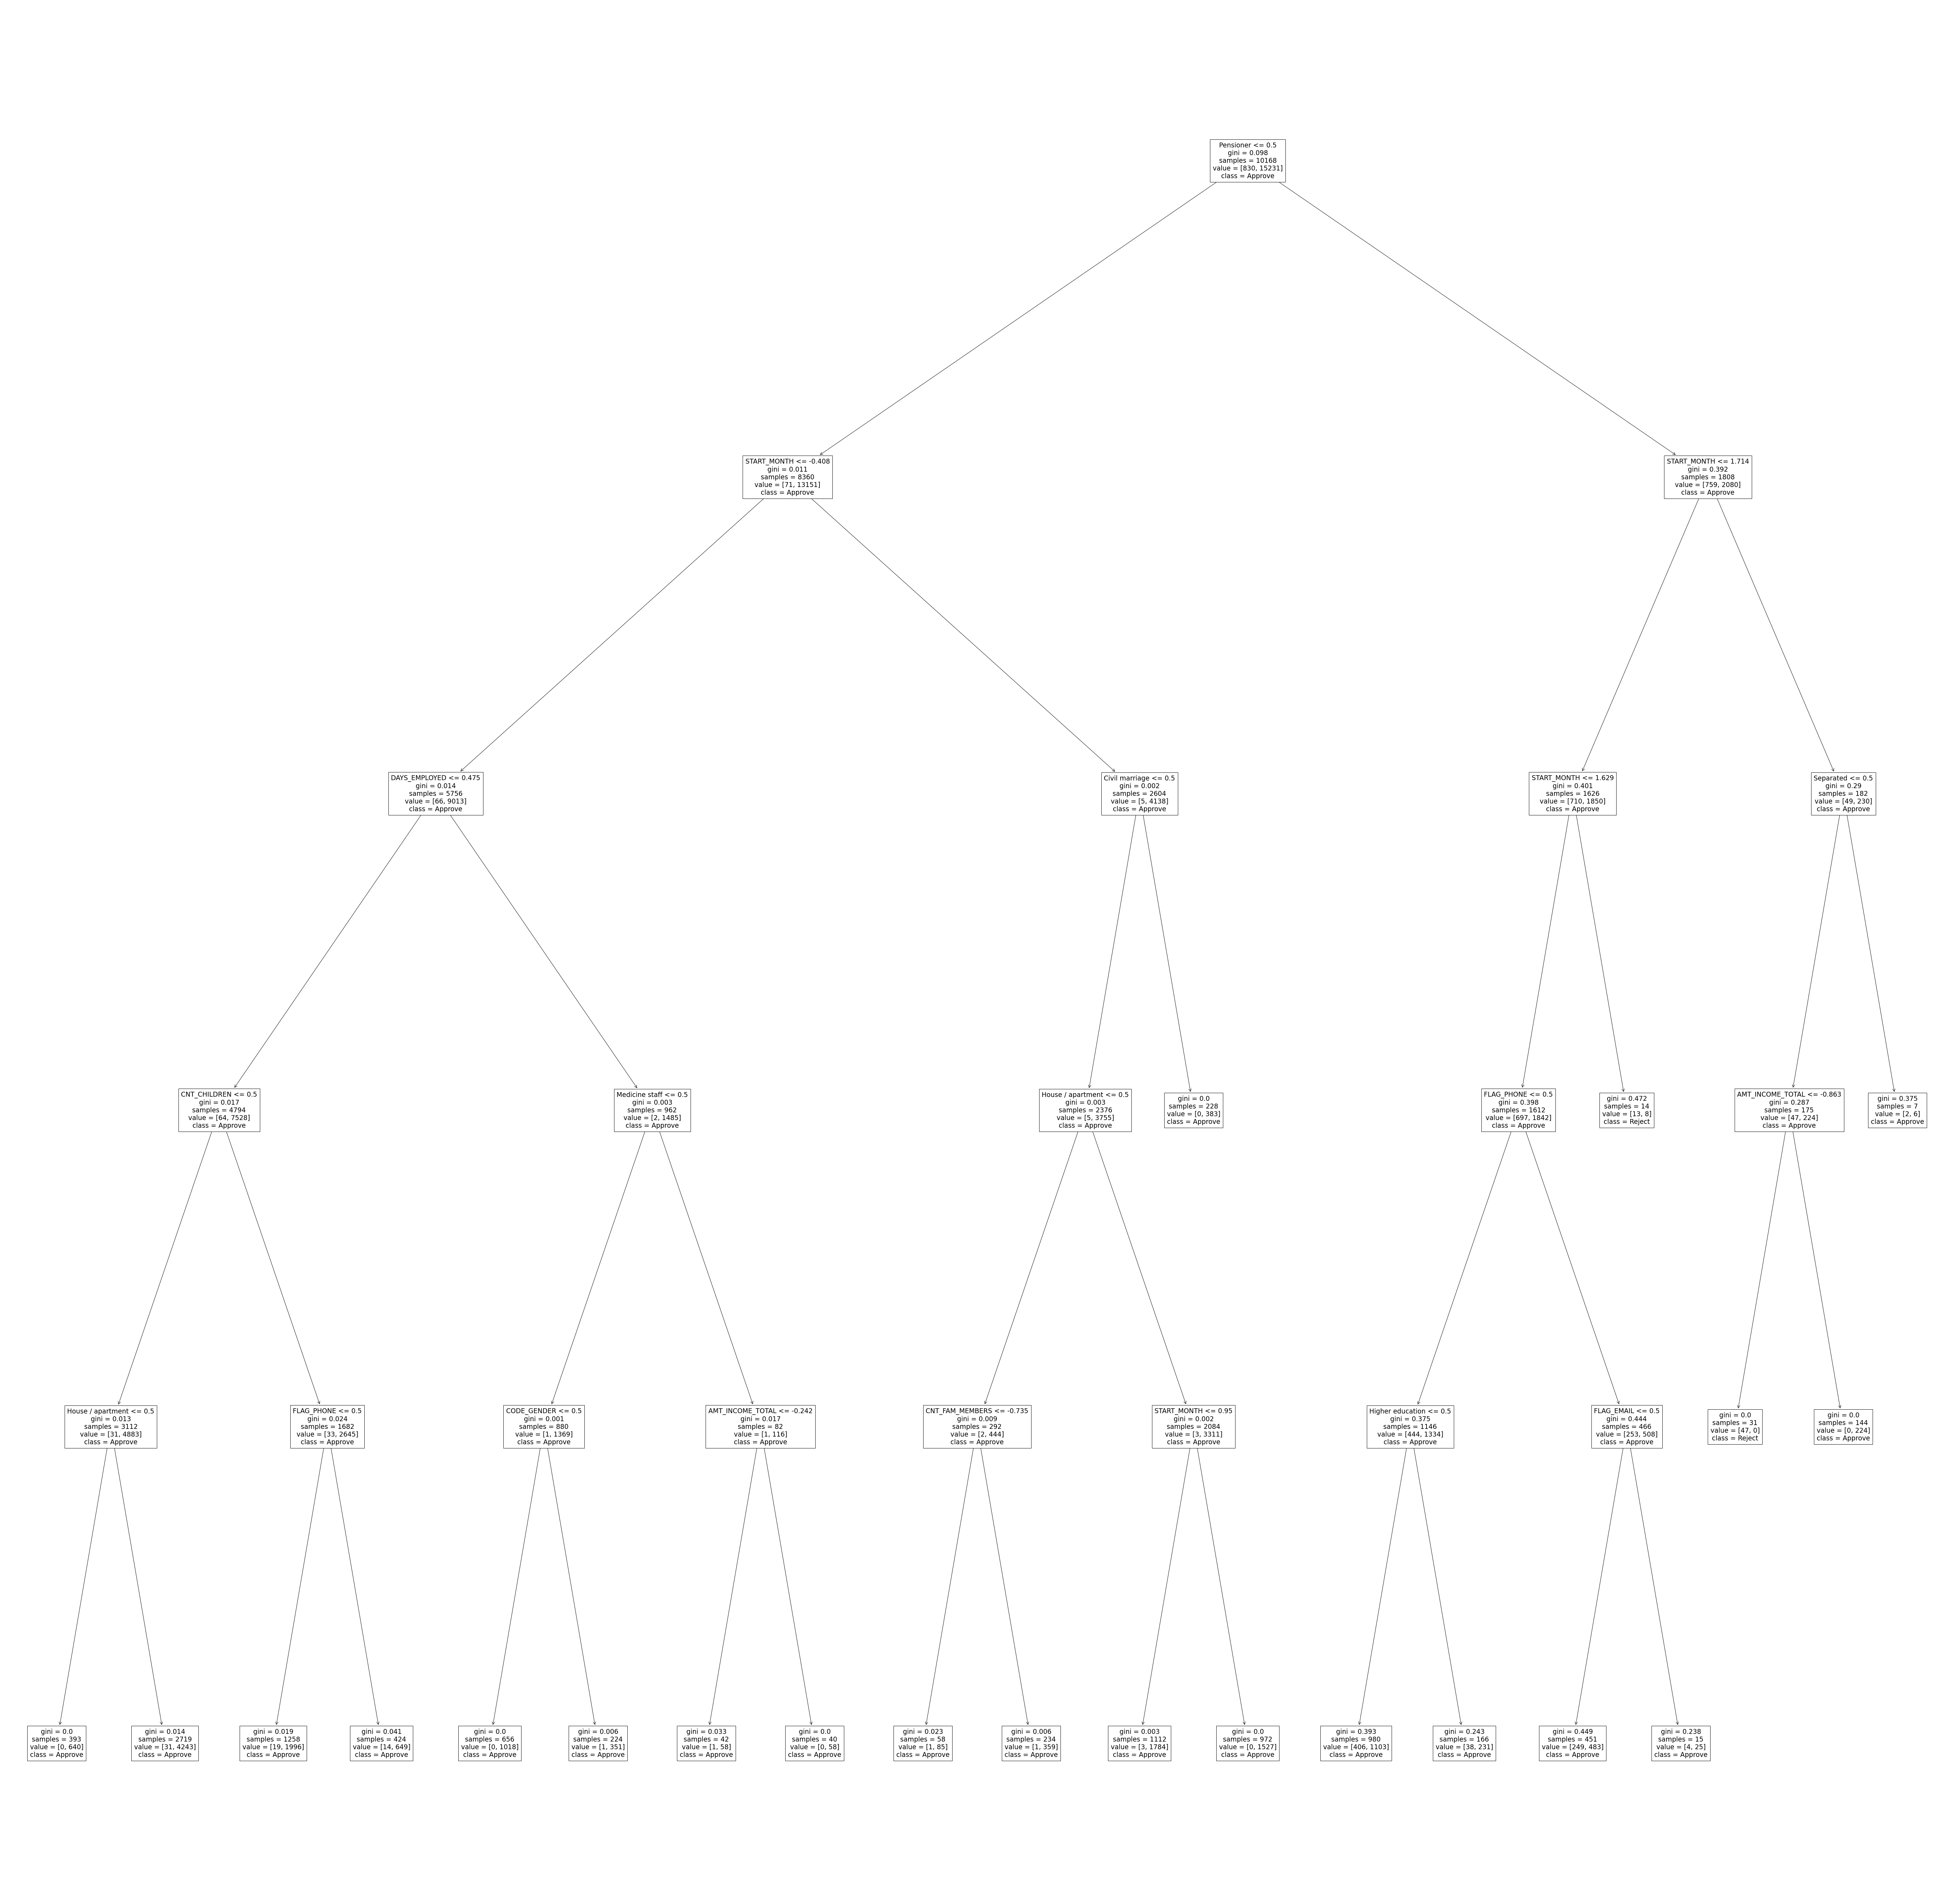

In [ ]:
estimator = model_rf.estimators_[5]

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(estimator, feature_names = data.columns, class_names = ['Reject', 'Approve'])

In [ ]:
#random forest - tuning parameters (Chantelle)
parameters = {'n_estimators': [150, 250, 350],
              'max_depth': [3, 4, 5, 6, 7],
              'min_samples_leaf': [3, 4, 5, 6, 7],
              'random_state': [1234]}

In [ ]:
%%time
model_tune = RandomForestClassifier()
rf_tune = GridSearchCV(model_tune,
                        parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_rf = rf_tune.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.954 total time=   1.1s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.938 total time=   0.8s
[CV 3/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.946 total time=   0.8s
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.953 total time=   1.3s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.940 total time=   1.3s
[CV 3/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.946 total time=   1.3s
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=350, random_state=1234;, score=0.953 total time=   1.7s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=350, random_state=1234;, score=0.940 total time=   2.5s
[CV 3/3] END max_d

In [ ]:
print(model_rf.best_params_)

y_predict_rf = model_rf.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_rf)))
print('Precision Score:', (precision_score(y_train, y_predict_rf)))
print('Recall Score:', (recall_score(y_train, y_predict_rf)))
print('F1 Score:', (f1_score(y_train, y_predict_rf)))

y_score_rf = model_rf.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 250, 'random_state': 1234}
Accuracy Score: 0.9942095759915323
Precision Score: 0.9939267289231372
Recall Score: 1.0
F1 Score: 0.9969541152195985
ROC Score: 0.9867428332143231


[[  748    93]
 [    0 15220]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


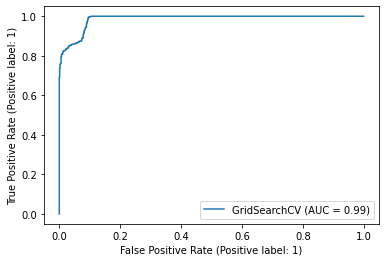

In [ ]:
print(confusion_matrix(y_train,y_predict_rf))
print(plot_roc_curve(model_rf, X_train, y_train))

In [ ]:
#chosen model - Random Forest (Tuned)
print(model_rf.best_params_)

y_predict_test = model_rf.predict(X_test)

print('Accuracy Score:', (accuracy_score(y_test, y_predict_test)))
print('Precision Score:', (precision_score(y_test, y_predict_test)))
print('Recall Score:', (recall_score(y_test, y_predict_test)))
print('F1 Score:', (f1_score(y_test, y_predict_test)))

y_score_test = model_rf.predict_proba(X_test)
print('ROC Score:', (roc_auc_score(y_test, y_score_test[:,1])))

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 250, 'random_state': 1234}
Accuracy Score: 0.9930278884462151
Precision Score: 0.9931704754399789
Recall Score: 0.9994713190589479
F1 Score: 0.9963109354413701
ROC Score: 0.9570202816076893


[[ 207   26]
 [   2 3781]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


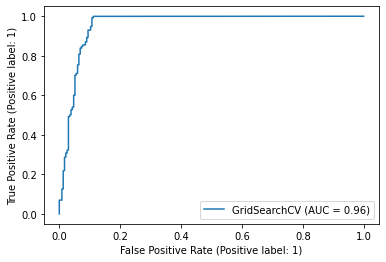

In [ ]:
print(confusion_matrix(y_test,y_predict_test))
print(plot_roc_curve(model_rf, X_test, y_test))

In [ ]:
rf_importances = model_rf.best_estimator_.feature_importances_
# rf_std = np.std([tree.feature_importances_ for tree in model_rf.best_estimator_.estimators_], axis=0)

feature_names = [f"{i}" for i in list(X_test.columns)]
forest_importances = pd.Series(rf_importances, index=feature_names)
most_important = forest_importances[forest_importances > 0.05]
most_important = most_important.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

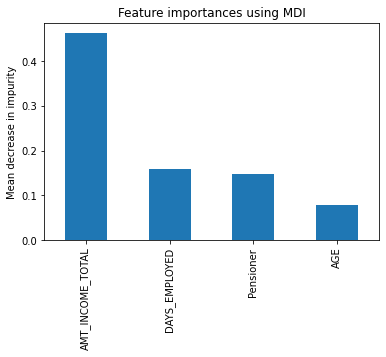

In [ ]:
fig, ax = plt.subplots()
most_important.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

### **Logistic Regression**

In [ ]:
%%time
logreg = LogisticRegression(penalty="none", max_iter=5000, random_state=1234)
logreg.fit(X_train, y_train)
y_predict_logreg = logreg.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_logreg)))
print('Precision Score:', (precision_score(y_train, y_predict_logreg)))
print('Recall Score:', (recall_score(y_train, y_predict_logreg)))
print('F1 Score:', (f1_score(y_train, y_predict_logreg)))

y_score_logreg = logreg.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_logreg[:,1])))

Accuracy Score: 0.9892285660917751
Precision Score: 0.9890152746181345
Recall Score: 0.9997371879106439
F1 Score: 0.9943473288678321
ROC Score: 0.9486522286683928
CPU times: user 7.64 s, sys: 3.93 s, total: 11.6 s
Wall time: 10.1 s


[[  672   169]
 [    4 15216]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


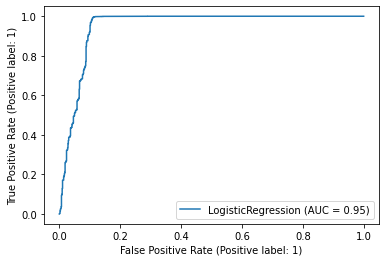

In [ ]:
print(confusion_matrix(y_train, y_predict_logreg))
print(plot_roc_curve(logreg, X_train, y_train))

In [ ]:
# logistic Regression - tuning parameters 
lg_parameters = {'solver': ['liblinear', 'saga'],
                 'penalty': ["l1", "l2"],
                 'C': [0.1, 0.5, 1, 10, 100],
                 'random_state': [1234]}

In [ ]:
%%time
logreg_tune = LogisticRegression(max_iter=5000)
lg_tune = GridSearchCV(logreg_tune,
                        lg_parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_lg = lg_tune.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.946 total time=   0.3s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.937 total time=   0.2s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.946 total time=   0.2s
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.947 total time=  17.9s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.938 total time=  19.6s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.947 total time=  17.5s
[CV 1/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.947 total time=   0.1s
[CV 2/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.937 total time=   0.1s
[CV 3/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.946 total time=   0.1s
[CV 1/3] END C=0.1, penalty=l2, random_state=

In [ ]:
print(model_lg.best_params_)

y_predict_lg = model_lg.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_lg)))
print('Precision Score:', (precision_score(y_train, y_predict_lg)))
print('Recall Score:', (recall_score(y_train, y_predict_lg)))
print('F1 Score:', (f1_score(y_train, y_predict_lg)))

y_score_lg = model_lg.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_lg[:,1])))

{'C': 100, 'penalty': 'l1', 'random_state': 1234, 'solver': 'liblinear'}
Accuracy Score: 0.9892285660917751
Precision Score: 0.9890152746181345
Recall Score: 0.9997371879106439
F1 Score: 0.9943473288678321
ROC Score: 0.9485710178577846


[[  672   169]
 [    4 15216]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


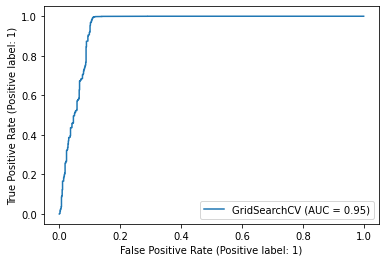

In [ ]:
print(confusion_matrix(y_train,y_predict_lg))
print(plot_roc_curve(model_lg, X_train, y_train))

### **Support Vector Machine**

In [ ]:
%%time
model_svm0 = SVC(probability=True, class_weight={1: 1000}).fit(X_train, y_train)

y_predict_svm0 = model_svm0.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_svm0)))
print('Precision Score:', (precision_score(y_train, y_predict_svm0)))
print('Recall Score:', (recall_score(y_train, y_predict_svm0)))
print('F1 Score:', (f1_score(y_train, y_predict_svm0)))

y_score_svm0 = model_svm0.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_svm0[:,1])))

Accuracy Score: 0.9373907080404594
Precision Score: 0.9373907080404594
Recall Score: 1.0
F1 Score: 0.9676837038085799
ROC Score: 0.8858341599391392
CPU times: user 54 s, sys: 74.8 ms, total: 54 s
Wall time: 56.9 s


[[    0  1826]
 [    0 27339]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


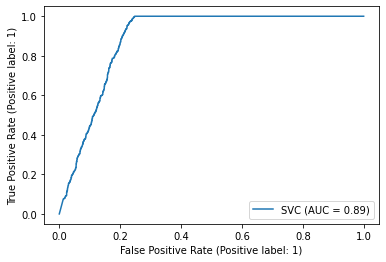

In [ ]:
print(confusion_matrix(y_train,y_predict_svm0))
print(plot_roc_curve(model_svm0, X_train, y_train))

In [ ]:
# support vector machine - tuning parameters 
svm_parameters = {'C': np.logspace(-1, 1, 3),
                  'kernel': ('linear', 'poly','rbf'),
                  'degree': [2,3]}

In [ ]:
%%time
model_svm = GridSearchCV(estimator=SVC(probability=True),
                         param_grid= svm_parameters,
                         cv = 3,
                         scoring='roc_auc',
                         verbose = 3).fit(X_train, y_train)
pd.DataFrame(model_svm.cv_results_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ....C=0.1, degree=2, kernel=linear;, score=0.868 total time=  15.7s
[CV 2/3] END ....C=0.1, degree=2, kernel=linear;, score=0.884 total time=  16.3s
[CV 3/3] END ....C=0.1, degree=2, kernel=linear;, score=0.884 total time=  15.0s
[CV 1/3] END ......C=0.1, degree=2, kernel=poly;, score=0.868 total time=  15.3s
[CV 2/3] END ......C=0.1, degree=2, kernel=poly;, score=0.885 total time=  13.8s
[CV 3/3] END ......C=0.1, degree=2, kernel=poly;, score=0.878 total time=  13.9s
[CV 1/3] END .......C=0.1, degree=2, kernel=rbf;, score=0.871 total time=  22.8s
[CV 2/3] END .......C=0.1, degree=2, kernel=rbf;, score=0.898 total time=  22.9s
[CV 3/3] END .......C=0.1, degree=2, kernel=rbf;, score=0.877 total time=  21.8s
[CV 1/3] END ....C=0.1, degree=3, kernel=linear;, score=0.868 total time=  14.8s
[CV 2/3] END ....C=0.1, degree=3, kernel=linear;, score=0.884 total time=  15.8s
[CV 3/3] END ....C=0.1, degree=3, kernel=linear;

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.976044,0.724058,0.688961,0.204277,0.1,2,linear,"{'C': 0.1, 'degree': 2, 'kernel': 'linear'}",0.868328,0.884360,0.884052,0.878913,0.007486,11
1,13.680605,0.682972,0.655526,0.008209,0.1,2,poly,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.868341,0.884628,0.878226,0.877065,0.006700,15
2,20.546965,0.501201,1.974321,0.296061,0.1,2,rbf,"{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}",0.871157,0.898477,0.877281,0.882305,0.011705,7
3,14.790524,0.427103,0.547893,0.010634,0.1,3,linear,"{'C': 0.1, 'degree': 3, 'kernel': 'linear'}",0.868328,0.884360,0.884052,0.878913,0.007486,11
4,13.298360,0.349107,0.715160,0.085047,0.1,3,poly,"{'C': 0.1, 'degree': 3, 'kernel': 'poly'}",0.869091,0.886808,0.875087,0.876995,0.007358,16
5,20.098071,1.189278,1.787725,0.025487,0.1,3,rbf,"{'C': 0.1, 'degree': 3, 'kernel': 'rbf'}",0.871157,0.898477,0.877281,0.882305,0.011705,7
6,27.835297,0.510767,0.532387,0.005965,1.0,2,linear,"{'C': 1.0, 'degree': 2, 'kernel': 'linear'}",0.874357,0.888564,0.888663,0.883861,0.006721,3
7,13.092481,0.314497,0.746797,0.143331,1.0,2,poly,"{'C': 1.0, 'degree': 2, 'kernel': 'poly'}",0.868356,0.884714,0.878394,0.877154,0.006736,14
8,20.255634,0.774237,1.751025,0.021546,1.0,2,rbf,"{'C': 1.0, 'degree': 2, 'kernel': 'rbf'}",0.871478,0.898303,0.877042,0.882274,0.011559,9
9,26.358910,0.285528,0.532055,0.007201,1.0,3,linear,"{'C': 1.0, 'degree': 3, 'kernel': 'linear'}",0.874357,0.888564,0.888663,0.883861,0.006721,3


In [ ]:
print(model_svm.best_params_)

y_predict_svm = model_svm.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_svm)))
print('Precision Score:', (precision_score(y_train, y_predict_svm)))
print('Recall Score:', (recall_score(y_train, y_predict_svm)))
print('F1 Score:', (f1_score(y_train, y_predict_svm)))

y_score_svm = model_svm.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_svm[:,1])))

{'C': 10.0, 'degree': 2, 'kernel': 'linear'}
Accuracy Score: 0.9811417795302588
Precision Score: 0.9807271291677134
Recall Score: 0.9995244888254874
F1 Score: 0.9900365928770697
ROC Score: 0.8882023309863056


[[ 1289   537]
 [   13 27326]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


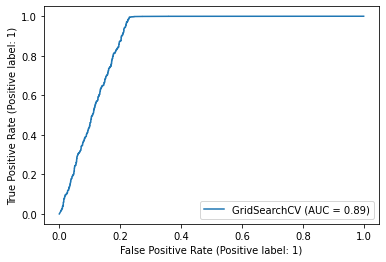

In [ ]:
print(confusion_matrix(y_train,y_predict_svm))
print(plot_roc_curve(model_svm, X_train, y_train))

### **Naive Bayes**

In [ ]:
# drop all columns for which values for all rows are the same as it does not contribute to prediction and 
# produces NaN values while scaling to ensure all values are non-negative(MultinomialNB does not accept negative column values)
nunique = X_train.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)


Index(['FLAG_MOBIL'], dtype='object')


In [ ]:
X_train_unique = X_train.drop(cols_to_drop, axis=1)

normalized_X_train=(X_train_unique-X_train_unique.min())/(X_train_unique.max()-X_train_unique.min())
print(normalized_X_train)

       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
20784          0.0           1.0              0.0      0.000000   
18675          0.0           1.0              1.0      0.000000   
24633          1.0           0.0              0.0      0.052632   
29328          0.0           0.0              1.0      0.000000   
21683          1.0           1.0              1.0      0.000000   
...            ...           ...              ...           ...   
32399          0.0           1.0              0.0      0.000000   
17048          0.0           1.0              1.0      0.000000   
23924          0.0           0.0              0.0      0.000000   
34086          1.0           1.0              0.0      0.000000   
27439          0.0           0.0              0.0      0.000000   

       AMT_INCOME_TOTAL  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
20784          0.069767       0.976635              1.0         1.0   
18675          0.090116       0.967084              0

In [ ]:
# fit the model without any optimisation
nb = MultinomialNB()
nb.fit(normalized_X_train, y_train)

nb_predict_train = nb.predict(normalized_X_train)

In [ ]:
# train set

# accuracy score
nb_train_acc = accuracy_score(y_train, nb_predict_train)

# precision
nb_train_precision = precision_score(y_train, nb_predict_train)

# recall
nb_train_recall = recall_score(y_train, nb_predict_train)

# roc_auc
nb_train_roc_auc = roc_auc_score(y_train, nb_predict_train)

# f1 score
nb_train_f1 = f1_score(y_train, nb_predict_train)

# confusion matrix
nb_train_cfm = confusion_matrix(y_train, nb_predict_train)

In [ ]:
# scores
print(nb_train_acc)
print(nb_train_precision)
print(nb_train_recall)
print(nb_train_roc_auc)
print(nb_train_f1)
print(nb_train_cfm)

0.8727584433396194
0.983585755218993
0.8789275394125609
0.8296609219516256
0.9283161737719485
[[ 1425   401]
 [ 3310 24029]]


In [ ]:
# fit with highly correlated features removed to optimise Naive Bayes model, as it assumes that input variables are assumed to be independent
nb_corr_matrix = normalized_X_train.corr().abs()

nb_corr_pairs = (nb_corr_matrix.where(np.triu(np.ones(nb_corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print(nb_corr_pairs)

DAYS_EMPLOYED     Pensioner                        0.997920
CNT_CHILDREN      CNT_FAM_MEMBERS                  0.888293
Higher education  Secondary / secondary special    0.887159
DAYS_EMPLOYED     Others                           0.669982
Pensioner         Others                           0.669029
                                                     ...   
With parents      Medicine staff                   0.000191
AMT_INCOME_TOTAL  Married                          0.000190
CNT_FAM_MEMBERS   House / apartment                0.000181
CNT_CHILDREN      IT staff                         0.000150
FLAG_PHONE        Municipal apartment              0.000071
Length: 1326, dtype: float64


In [ ]:
highly_correlated_pairs = nb_corr_pairs[nb_corr_pairs > 0.90]
highly_correlated_pairs

DAYS_EMPLOYED  Pensioner    0.99792
dtype: float64

In [ ]:
nb_highly_correlated_cols = ['DAYS_EMPLOYED','UNEMPLOYED','DAYS_BIRTH','AGE','Pensioner']
normalized_X_train_dropped = normalized_X_train.drop(nb_highly_correlated_cols, axis=1)
normalized_X_train_dropped

In [ ]:
nb2 = MultinomialNB()
nb2.fit(normalized_X_train_dropped, y_train)
nb2_predict_train = nb2.predict(normalized_X_train_dropped)

In [ ]:
# train set after dropping highly correlated columns

# accuracy score
nb2_train_acc = accuracy_score(y_train, nb2_predict_train)

# precision
nb2_train_precision = precision_score(y_train, nb2_predict_train)

# recall
nb2_train_recall = recall_score(y_train, nb2_predict_train)

# roc_auc
nb2_train_roc_auc = roc_auc_score(y_train, nb2_predict_train)

# confusion matrix
nb2_train_cfm = confusion_matrix(y_train, nb2_predict_train)

In [ ]:
# train set
print(nb2_train_acc)
print(nb2_train_precision)
print(nb2_train_recall)
print(nb2_train_roc_auc)
print(nb2_train_cfm)

#### Numerical variables are: AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_EMPLOYED, START_MONTH, CNT_CHILDREN, AGE


In [ ]:
# check for normality of variables 
# converting non-normal numerical columns improves Niave Bayes model
stats.probplot(normalized_X_train['AMT_INCOME_TOTAL'], dist="norm", plot=pylab)
plt.title('QQ Plot for AMT_INCOME_TOTAL')
pylab.show()
stats.probplot(normalized_X_train['CNT_FAM_MEMBERS'], dist="norm", plot=pylab)
plt.title('QQ Plot for CNT_FAM_MEMBERS')
pylab.show()
stats.probplot(normalized_X_train['DAYS_BIRTH'], dist="norm", plot=pylab)
plt.title('QQ Plot for DAYS_BIRTH')
pylab.show()
stats.probplot(normalized_X_train['DAYS_EMPLOYED'], dist="norm", plot=pylab)
plt.title('QQ Plot for DAYS_EMPLOYED')
pylab.show()
stats.probplot(normalized_X_train['START_MONTH'], dist="norm", plot=pylab)
plt.title('QQ Plot for START_MONTH')
pylab.show()
stats.probplot(normalized_X_train['CNT_CHILDREN'], dist="norm", plot=pylab)
plt.title('QQ Plot for CNT_CHILDREN')
pylab.show()
stats.probplot(normalized_X_train['AGE'], dist="norm", plot=pylab)
plt.title('QQ Plot for AGE')
pylab.show()

#### All of the numerical variables: AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_EMPLOYED, START_MONTH, CNT_CHILDREN, AGE have non-normal distribution from their QQ plots. DAYS_BIRTH and AGE have already been dropped previously due to their high correlation. Hence, variables that need to be dropped further are: AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, START_MONTH, CNT_CHILDREN 

In [ ]:
nb_non_normal_cols = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'START_MONTH', 'CNT_CHILDREN']
X_train_normal = normalized_X_train_dropped.drop(nb_non_normal_cols, axis=1)
X_train_normal

In [ ]:
# fit with non-normal numerical features removed
nb3 = MultinomialNB()
nb3.fit(X_train_normal, y_train)
nb3_predict_train = nb3.predict(X_train_normal)

In [ ]:
# train set after dropping non-normal variables

# accuracy score
nb3_train_acc = accuracy_score(y_train, nb3_predict_train)

# precision
nb3_train_precision = precision_score(y_train, nb3_predict_train)

# recall
nb3_train_recall = recall_score(y_train, nb3_predict_train)

# roc_auc
nb3_train_roc_auc = roc_auc_score(y_train, nb3_predict_train)

# confusion matrix
nb3_train_cfm = confusion_matrix(y_train, nb3_predict_train)

In [ ]:
# train set
print(nb3_train_acc)
print(nb3_train_precision)
print(nb3_train_recall)
print(nb3_train_roc_auc)
print(nb3_train_cfm)

#### The values, especially the accuracy score, vary minimally from the previous adjustment(removing highly correlated columns)

## Grid Search for Hyperparameter Tuning

In [ ]:
# defining parameter range 
nb_param_grid = {'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001],  
              'fit_prior': [False, True], 
              }  
   
nb_tuned_param = GridSearchCV(MultinomialNB(), nb_param_grid) 
   
# fitting the model for grid search 
nb_tuned_param.fit(X_train_normal, y_train) 
 
# print best parameter after tuning 
print(nb_tuned_param.best_params_) 

nb4_predict_train = nb_tuned_param.predict(X_train_normal)

In [ ]:
# train set after tuning via grid search

# accuracy score
nb4_train_acc = accuracy_score(y_train, nb4_predict_train)

# precision
nb4_train_precision = precision_score(y_train, nb4_predict_train)

# recall
nb4_train_recall = recall_score(y_train, nb4_predict_train)

# roc_auc
nb4_train_roc_auc = roc_auc_score(y_train, nb4_predict_train)

# confusion matrix
nb4_train_cfm = confusion_matrix(y_train, nb4_predict_train)

In [ ]:
# train set
print(nb4_train_acc)
print(nb4_train_precision)
print(nb4_train_recall)
print(nb4_train_roc_auc)
print(nb4_train_cfm)

## Testing

In [ ]:
# Normalisation of test set
nunique = X_test.nunique()
cols_to_drop = nunique[nunique == 1].index

X_test_unique = X_test.drop(cols_to_drop, axis=1)

normalized_X_test = (X_test_unique-X_test_unique.min())/(X_test_unique.max()-X_test_unique.min())

# dropping highly correlated variables in test set
nb_highly_correlated_cols = ['DAYS_EMPLOYED','UNEMPLOYED','DAYS_BIRTH','AGE','Pensioner']
normalized_X_test_dropped = normalized_X_test.drop(nb_highly_correlated_cols, axis=1)
# normalized_X_test_dropped

# dropping non-normal variables in test set
nb_non_normal_cols = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'START_MONTH', 'CNT_CHILDREN']
X_test_normal = normalized_X_test_dropped.drop(nb_non_normal_cols, axis=1)
X_test_normal

In [ ]:
nb_predict_test = nb_tuned_param.predict(X_test_normal)

In [ ]:
# accuracy score
nb_test_acc = accuracy_score(y_test, nb_predict_test)

# precision
nb_test_precision = precision_score(y_test, nb_predict_test)

# recall
nb_test_recall = recall_score(y_test, nb_predict_test)

# f1 
nb_test_f1 = f1_score(y_test, nb_predict_test)

# roc_auc
nb_test_roc_auc = roc_auc_score(y_test, nb_predict_test)

# confusion matrix
nb_test_cfm = confusion_matrix(y_test, nb_predict_test)

In [ ]:
# train set
print(nb_test_acc)
print(nb_test_precision)
print(nb_test_recall)
print(nb_test_f1)
print(nb_test_roc_auc)
print(nb_test_cfm)
# plot roc curve
plot_roc_curve(nb_tuned_param, X_test_normal, y_test)

## Feature Selection

In [ ]:
# using the optimised model
nb5 = MultinomialNB(alpha=0, fit_prior=True)
nb5.fit(X_train_normal, y_train)

nb_sample_cnt_by_class = nb5.feature_count_

In [ ]:
nb_neg = nb_sample_cnt_by_class[0]
nb_pos = nb_sample_cnt_by_class[1]

nb_freq_diff_pos = nb_pos - nb_neg
nb_freq_diff_neg = nb_neg - nb_pos

In [ ]:
# something wrong in the predicted features
nb_feature_names = nb5.feature_names_in_
neg_class_prob_sorted = nb_freq_diff_neg.argsort()[::-1]
pos_class_prob_sorted = nb_freq_diff_pos.argsort()[::-1]

most_neg_features = np.take(nb_feature_names, neg_class_prob_sorted[:10])
most_pos_features = np.take(nb_feature_names, pos_class_prob_sorted[:10])

print('10 features most predictive of negative class are: ', most_neg_features)
print('10 features most predictive of positive class are: ', most_pos_features)

#Neural Network

In [ ]:
nnmodel = keras.models.Sequential() 
nnmodel.add(keras.layers.Flatten(input_shape=[ 55]))
nnmodel.add(keras.layers.Dense(200, activation='ReLU'))
nnmodel.add(keras.layers.Dense(200, activation='ReLU'))
nnmodel.add(keras.layers.Dense(100, activation='ReLU'))
nnmodel.add(keras.layers.Dense(100, activation='ReLU'))
nnmodel.add(keras.layers.Dense(1, activation='sigmoid'))
nnmodel.compile(metrics=['AUC'],
              loss='mse',
              optimizer='sgd')

In [ ]:
result = nnmodel.evaluate(X_test, y_test)
print('Model loss: %f' % result[0])
print('Model accuracy: %f' % result[1])
# Model loss: 0.036972
# Model accuracy: 0.946654

In [ ]:
#Training data
y_pred_keras_train = nnmodel.predict(X_train).ravel()
fpr_nn_train, tpr_nn_train, thresholds_nn_train = roc_curve(y_train, y_pred_keras_train)
auc_nn_train = auc(fpr_nn_train, tpr_nn_train)

y_predict_nn_train_round = y_predict_nn_train.round(0)
print('Accuracy Score:', (accuracy_score(y_train, y_predict_nn_train_round)))
print('Precision Score:', (precision_score(y_train, y_predict_nn_train_round)))
print('Recall Score:', (recall_score(y_train, y_predict_nn_train_round)))
print('F1 Score:', (f1_score(y_train, y_predict_nn_train_round)))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn_train, tpr_nn_train, label='Keras (area = {:.3f})'.format(auc_nn_train))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve For Train Data')
plt.legend(loc='best')
plt.show()

In [ ]:
#Test data
y_predict_nn_test_round = y_predict_nn_test.round(0)
print('Accuracy Score:', (accuracy_score(y_test, y_predict_nn_test_round)))
print('Precision Score:', (precision_score(y_test, y_predict_nn_test_round)))
print('Recall Score:', (recall_score(y_test, y_predict_nn_test_round)))
print('F1 Score:', (f1_score(y_test, y_predict_nn_test_round)))

In [ ]:
y_pred_keras = nnmodel.predict(X_test).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_keras)
auc_nn = auc(fpr_nn, tpr_nn)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Keras (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()